In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [12]:
# Charger les données
data = pd.read_csv('fire_risk_data.csv')

In [6]:
# Aperçu des données
data.head()

,temperature,humidity,wind_speed,wind_direction,precipitation,drought_index,fire_risk
0,24.363503,52.139310,20.080327,SE,8.179848,4.443722,0
1,38.767858,57.169122,6.992877,W,5.876945,4.286586,0
2,33.299849,36.204108,22.077857,SE,2.521820,1.489155,0
3,29.966462,56.244440,28.314168,E,2.037174,4.394351,0
4,18.900466,32.859828,19.391631,W,3.403848,2.656274,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature     2568 non-null   float64
 1   humidity        2568 non-null   float64
 2   wind_speed      2568 non-null   float64
 3   wind_direction  2568 non-null   object 
 4   precipitation   2568 non-null   float64
 5   drought_index   2568 non-null   float64
 6   fire_risk       2568 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 140.6+ KB


In [8]:
data.describe()

,temperature,humidity,wind_speed,precipitation,drought_index,fire_risk
count,2568.000000,2568.000000,2568.000000,2568.000000,2568.000000,2568.000000
mean,27.475244,39.750370,17.384543,5.041679,2.980579,0.094626
std,7.284645,11.492556,7.190913,2.849246,1.175197,0.292755
min,15.039128,20.000465,5.006025,0.000528,1.000631,0.000000
25%,21.058028,29.873950,11.156528,2.627981,1.948160,0.000000
50%,27.646767,39.588599,17.245440,5.032189,2.942124,0.000000
75%,33.780683,49.642783,23.570380,7.508956,4.030105,0.000000
max,39.992942,59.982308,29.986517,9.996732,4.995379,1.000000


## Prétraitement des données

In [9]:
# Vérification des valeurs manquantes
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 temperature       0
humidity          0
wind_speed        0
wind_direction    0
precipitation     0
drought_index     0
fire_risk         0
dtype: int64


## Analyse exploratoire des données (EDA)

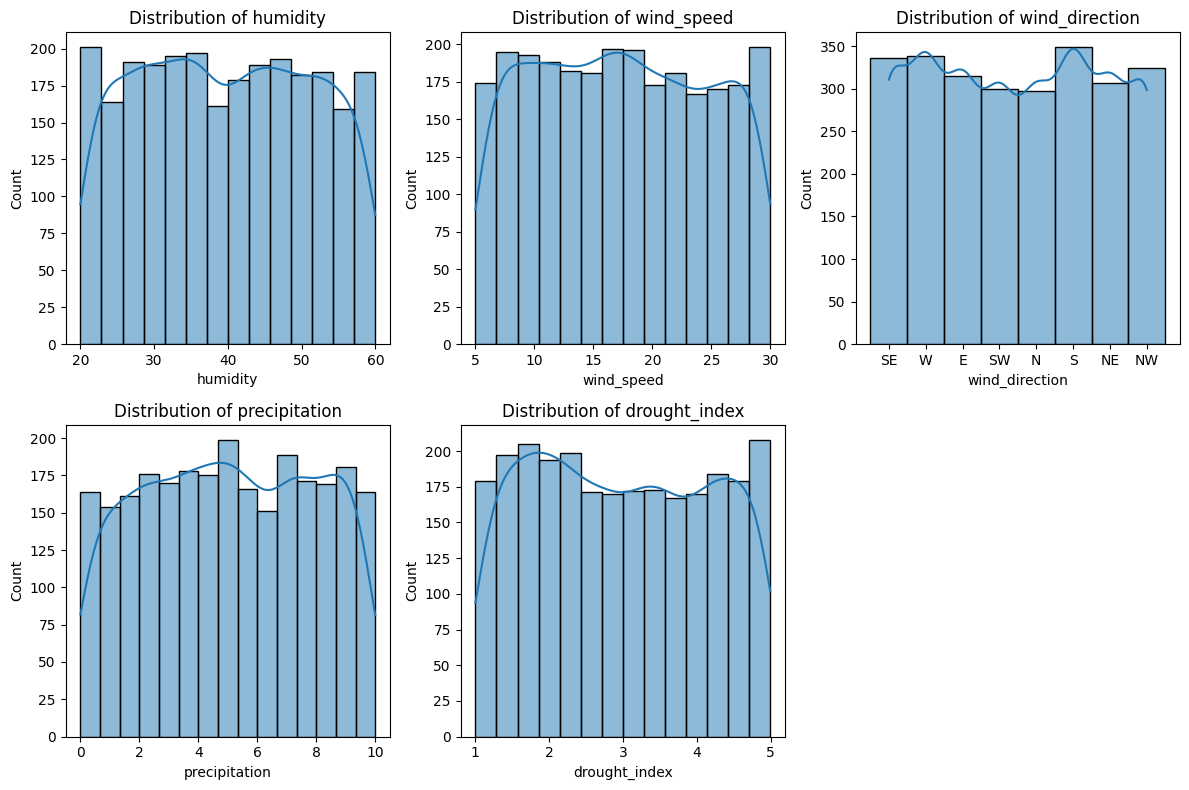

In [13]:
# Visualisation des distributions des variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[1:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

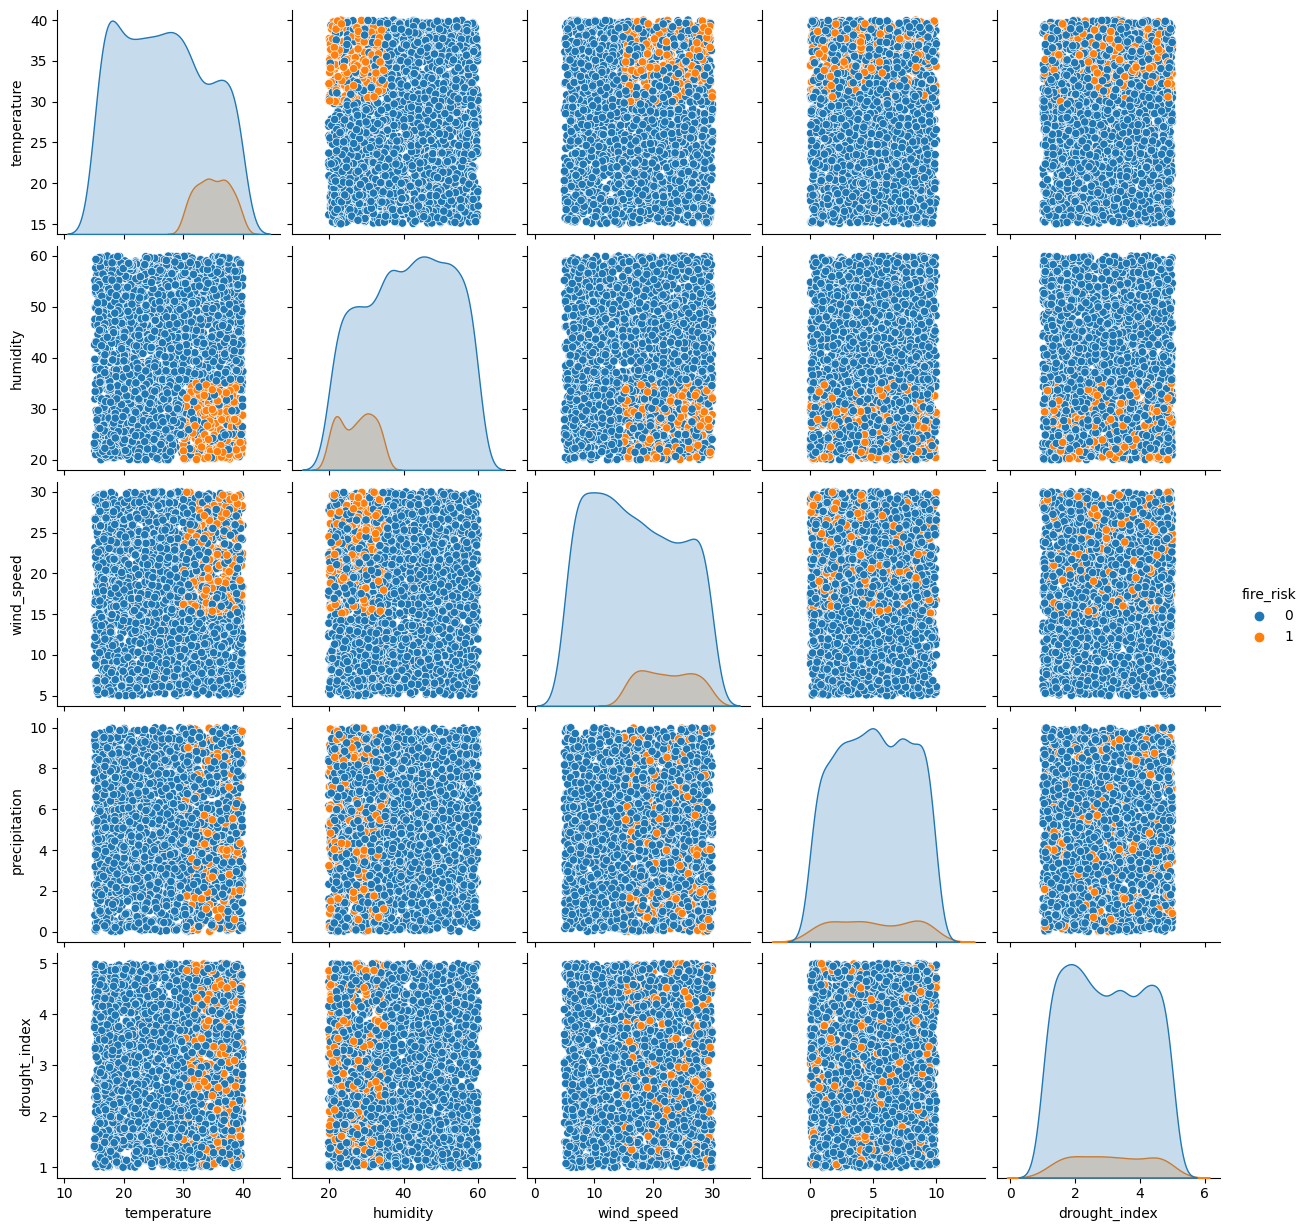

In [14]:
# Visualisation des relations entre les variables
sns.pairplot(data, hue='fire_risk')
plt.show()

C:\Users\Aymane\AppData\Local\Temp\ipykernel_13940\2110032849.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


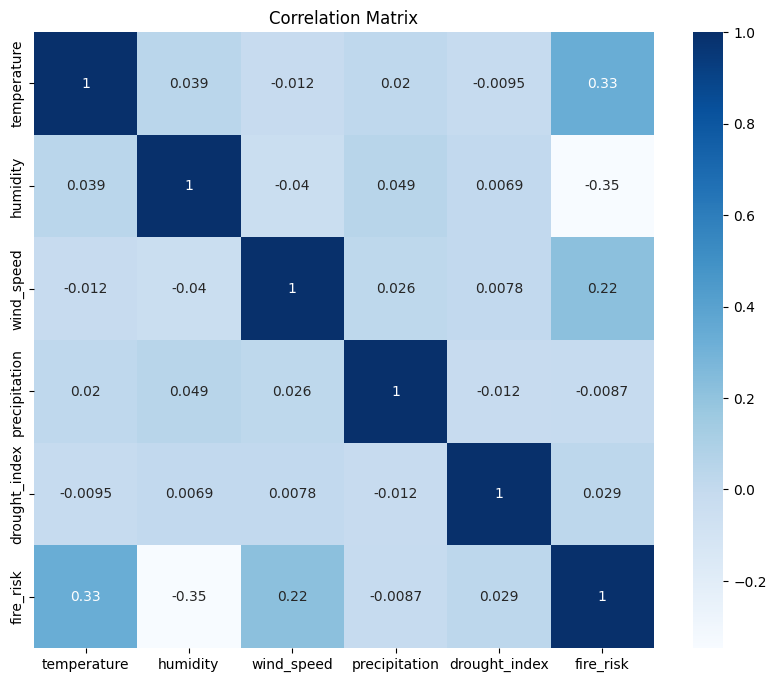

In [23]:
# Matrice de corrélation
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

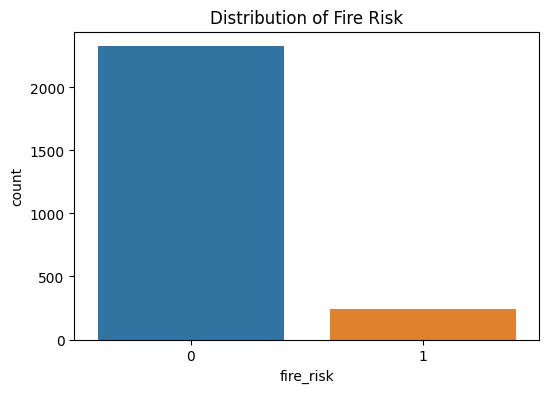

In [24]:
# Distribution de la variable cible (fire_risk)
plt.figure(figsize=(6, 4))
sns.countplot(x='fire_risk', data=data)
plt.title('Distribution of Fire Risk')
plt.show()

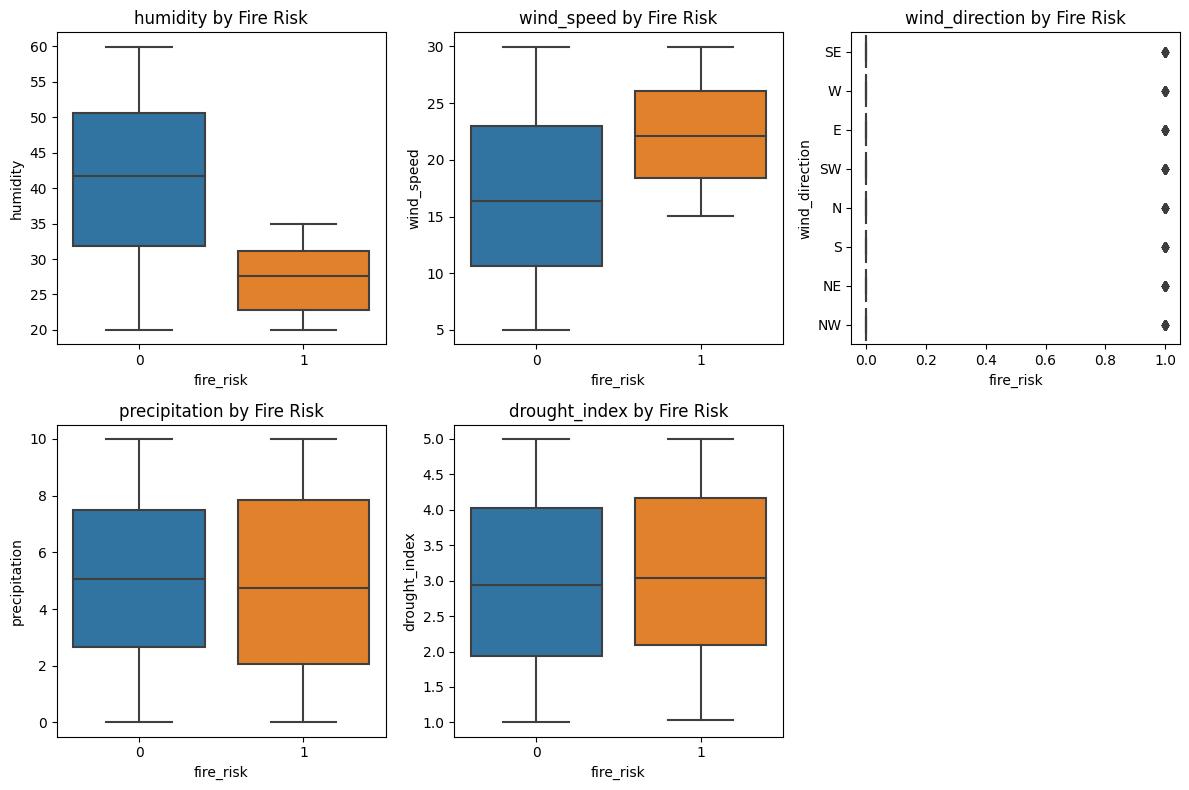

In [25]:
# Analyse des caractéristiques en fonction de la variable cible
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[1:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='fire_risk', y=column, data=data)
    plt.title(f'{column} by Fire Risk')
plt.tight_layout()
plt.show()

## Sélection et évaluation du modèle

In [34]:
# Normalisation des variables continues
scaler = StandardScaler()
data[['temperature', 'humidity', 'wind_speed', 'precipitation', 'drought_index']] = scaler.fit_transform(data[['temperature', 'humidity', 'wind_speed', 'precipitation', 'drought_index']])


In [35]:
data.head()

,temperature,humidity,wind_speed,wind_direction,precipitation,drought_index,fire_risk
0,-0.427248,1.078207,0.374960,SE,1.101618,1.245262,0
1,1.550496,1.515950,-1.445392,W,0.293210,1.111526,0
2,0.799729,-0.308631,0.652800,SE,-0.884567,-1.269331,0
3,0.342049,1.435475,1.520218,E,-1.054697,1.203242,0
4,-1.177332,-0.599682,0.279169,W,-0.574942,-0.276011,0


In [36]:
# Sélection des caractéristiques et de la variable cible
X = data.drop(['fire_risk', 'wind_direction'], axis=1)
y = data['fire_risk']

In [37]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
## Initialisation du modèle Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Évaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_log_reg))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_log_reg))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.940337224383917
Logistic Regression Precision: 0.6521739130434783
Logistic Regression Recall: 0.6716417910447762
Logistic Regression F1 Score: 0.6617647058823529


In [41]:
# Initialisation du modèle Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Évaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0


In [44]:
# Initialisation du modèle SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Évaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("SVM Recall:", recall_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm))


SVM Accuracy: 0.9792477302204928
SVM Precision: 0.9322033898305084
SVM Recall: 0.8208955223880597
SVM F1 Score: 0.873015873015873


In [45]:
# Initialisation du modèle de gradient boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Évaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Precision:", precision_score(y_test, y_pred_gb))
print("Gradient Boosting Recall:", recall_score(y_test, y_pred_gb))
print("Gradient Boosting F1 Score:", f1_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 1.0
Gradient Boosting Precision: 1.0
Gradient Boosting Recall: 1.0
Gradient Boosting F1 Score: 1.0


In [46]:
# Initialisation du modèle Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Évaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F1 Score: 1.0
